In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pwd

/content


In [3]:
cd /content/drive/My Drive/Backup/EVP/S9

/content/drive/My Drive/Backup/EVP/S9


In [4]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-cwi2u33i
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-cwi2u33i
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65099 sha256=5302bc816c47cc5c5f957898d91a2b8ac852937d0688782f28cd1e93263f6de9
  Stored in directory: /tmp/pip-ephem-wheel-cache-fahe9bsd/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.4.5
    Uninstalling albumentations-0.4.5:
      Successfully uninstalled albumentations-0.4.5


In [0]:
from __future__ import print_function
import torch
# from torch.optim.lr_scheduler import OneCycleLR
# import numpy as np
# import matplotlib.pyplot as plt

# Setting Seed for Reproducibility

In [6]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

CUDA Available? True


# Data Loader


In [0]:
import torchvision
from torchvision import datasets, transforms
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, Flip, OneOf, Compose, Normalize, Cutout, Rotate

)
from vision.train.data_loader import TrainsetLoader
# from albumentations.pytorch import ToTensor


In [0]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

## Visualise Data

In [0]:
albumentations_pil_transform_train = [
    HorizontalFlip(),
    Cutout(),
    Rotate((-9.0, 9.0))
]

In [0]:
mean = (0.5, 0.5, 0.5)
std = (0.5, 0.5, 0.5)
trainset_config_list = {
    'dataset' : datasets.CIFAR10,
    'mean' : mean,
    'std' : std,
    'trainset_transforms' : albumentations_pil_transform_train,
    'batch_size' : 64,
    'num_workers': 4,
    'use_cuda' : torch.cuda.is_available()

}

In [11]:
trainloader_obj = TrainsetLoader(trainset_config_list)
train_loader, test_loader = trainloader_obj()

Files already downloaded and verified
Files already downloaded and verified


plane   dog  deer  deer


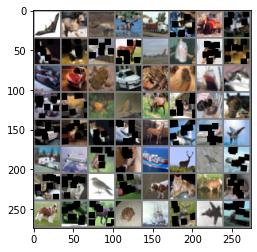

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Model Summary


In [0]:
from vision.models.resnet import ResNet18

try:
  from torchsummary import summary
except:
  !pip install torchsummary
  from torchsummary import summary

In [14]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet18().to(device)
summary(model, input_size=(3,32,32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

# Train and Evaluate Model

In [15]:
from vision.train.train_evaluate import Train
import torch.nn as nn
import torch.optim as optim

CUDA Available? True


## Initialising and setting hyper-parameters


In [0]:
EPOCHS = 25
learning_rate = 0.01
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = ResNet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
scheduler =None
# scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(train_loader), epochs=EPOCHS)


## Creating Config for Training 

In [0]:
config_list ={
    "device": device,
    "model": model,
    "EPOCHS": EPOCHS,
    "criterion": criterion,
    "optimizer": optimizer,
    "scheduler": scheduler,
    "logger": None,
    "train_loader": train_loader,
    "test_loader" : test_loader,
    "flag_misclassified_images": False
}

## Create obj of Train and run for training


In [18]:
cifar_model_train = Train(config_list)
cifar_model_train.run_model()

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH:1


Loss=1.7746790647506714 Batch_id=781 Accuracy=43.23: 100%|██████████| 782/782 [01:44<00:00,  7.52it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0208, Accuracy: 5406/10000 (54.06%)

EPOCH:2


Loss=1.4535231590270996 Batch_id=781 Accuracy=60.06: 100%|██████████| 782/782 [01:44<00:00,  7.49it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0138, Accuracy: 6906/10000 (69.06%)

EPOCH:3


Loss=0.5514451861381531 Batch_id=781 Accuracy=68.23: 100%|██████████| 782/782 [01:44<00:00,  7.50it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0113, Accuracy: 7431/10000 (74.31%)

EPOCH:4


Loss=0.78264981508255 Batch_id=781 Accuracy=72.57: 100%|██████████| 782/782 [01:44<00:00,  7.49it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0105, Accuracy: 7662/10000 (76.62%)

EPOCH:5


Loss=0.6212546229362488 Batch_id=781 Accuracy=75.91: 100%|██████████| 782/782 [01:44<00:00,  7.48it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0097, Accuracy: 7898/10000 (78.98%)

EPOCH:6


Loss=0.8807407021522522 Batch_id=781 Accuracy=77.85: 100%|██████████| 782/782 [01:44<00:00,  7.49it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0091, Accuracy: 8057/10000 (80.57%)

EPOCH:7


Loss=0.5466395616531372 Batch_id=781 Accuracy=79.68: 100%|██████████| 782/782 [01:43<00:00,  7.52it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0094, Accuracy: 8049/10000 (80.49%)

EPOCH:8


Loss=0.39382845163345337 Batch_id=781 Accuracy=81.19: 100%|██████████| 782/782 [01:43<00:00,  7.53it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0079, Accuracy: 8274/10000 (82.74%)

EPOCH:9


Loss=0.7145897746086121 Batch_id=781 Accuracy=82.52: 100%|██████████| 782/782 [01:44<00:00,  7.49it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 8461/10000 (84.61%)

EPOCH:10


Loss=0.5849329829216003 Batch_id=781 Accuracy=83.53: 100%|██████████| 782/782 [01:44<00:00,  7.49it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 8541/10000 (85.41%)

EPOCH:11


Loss=0.41704443097114563 Batch_id=781 Accuracy=84.62: 100%|██████████| 782/782 [01:43<00:00,  7.54it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0078, Accuracy: 8488/10000 (84.88%)

EPOCH:12


Loss=0.2637747526168823 Batch_id=781 Accuracy=85.39: 100%|██████████| 782/782 [01:43<00:00,  7.57it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 8630/10000 (86.30%)

EPOCH:13


Loss=0.7341119050979614 Batch_id=781 Accuracy=86.41: 100%|██████████| 782/782 [01:43<00:00,  7.55it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 8539/10000 (85.39%)

EPOCH:14


Loss=0.4661312997341156 Batch_id=781 Accuracy=87.41: 100%|██████████| 782/782 [01:43<00:00,  7.55it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 8623/10000 (86.23%)

EPOCH:15


Loss=0.5552569627761841 Batch_id=781 Accuracy=87.67: 100%|██████████| 782/782 [01:43<00:00,  7.54it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 8558/10000 (85.58%)

EPOCH:16


Loss=0.15404759347438812 Batch_id=781 Accuracy=88.13: 100%|██████████| 782/782 [01:43<00:00,  7.55it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 8681/10000 (86.81%)

EPOCH:17


Loss=0.13429412245750427 Batch_id=781 Accuracy=88.86: 100%|██████████| 782/782 [01:43<00:00,  7.55it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 8836/10000 (88.36%)

EPOCH:18


Loss=0.5698715448379517 Batch_id=781 Accuracy=89.42: 100%|██████████| 782/782 [01:43<00:00,  7.56it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 8856/10000 (88.56%)

EPOCH:19


Loss=0.3031817376613617 Batch_id=781 Accuracy=89.84: 100%|██████████| 782/782 [01:44<00:00,  7.52it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 8808/10000 (88.08%)

EPOCH:20


Loss=0.34696337580680847 Batch_id=781 Accuracy=90.35: 100%|██████████| 782/782 [01:43<00:00,  7.55it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 8788/10000 (87.88%)

EPOCH:21


Loss=0.2166198045015335 Batch_id=781 Accuracy=90.91: 100%|██████████| 782/782 [01:43<00:00,  7.52it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8834/10000 (88.34%)

EPOCH:22


Loss=0.31148549914360046 Batch_id=781 Accuracy=91.02: 100%|██████████| 782/782 [01:45<00:00,  7.38it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8881/10000 (88.81%)

EPOCH:23


Loss=0.7568950057029724 Batch_id=781 Accuracy=91.49: 100%|██████████| 782/782 [01:45<00:00,  7.42it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 8886/10000 (88.86%)

EPOCH:24


Loss=0.6967331171035767 Batch_id=781 Accuracy=91.67: 100%|██████████| 782/782 [01:45<00:00,  7.42it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 8787/10000 (87.87%)

EPOCH:25


Loss=0.6280441284179688 Batch_id=781 Accuracy=92.07: 100%|██████████| 782/782 [01:45<00:00,  7.42it/s]



Test set: Average loss: 0.0059, Accuracy: 8948/10000 (89.48%)



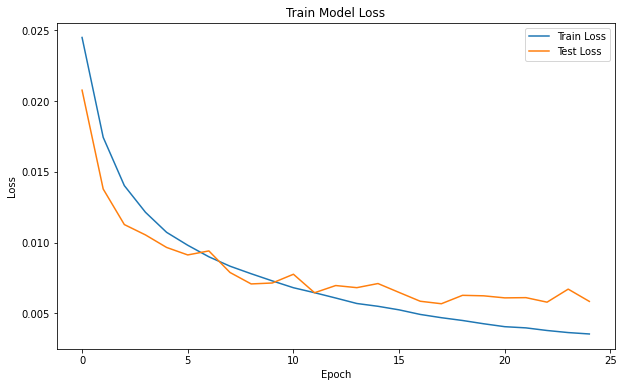

In [19]:
cifar_model_train.plot_loss_graph()

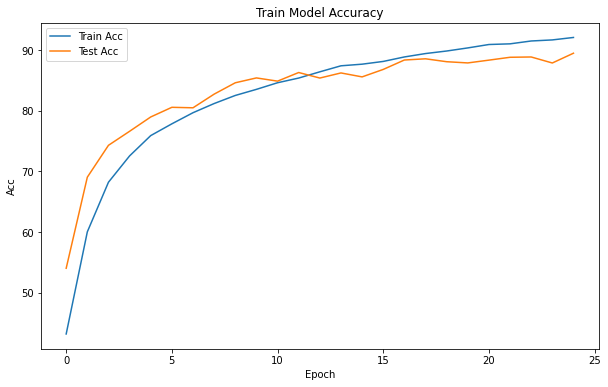

In [20]:
cifar_model_train.plot_acc_graph()

In [0]:
visualize_config_list = {
    'device':device,
    'mean': mean,
    'std': std,
    'resize_shape': (32,32),
    'model': cifar_model_train.model,
    'test_loader' : test_loader
}

In [0]:
from vision.train.utils.visualize import Visualization

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


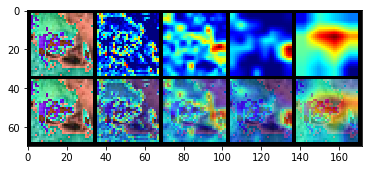

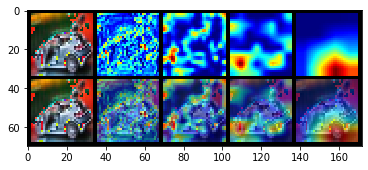

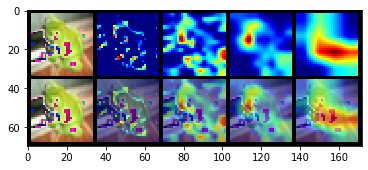

In [28]:
visual_obj = Visualization(visualize_config_list)
visual_obj.heatmap_activations(5)
visual_obj.heatmap_activations(6)
visual_obj.heatmap_activations(7)